In [19]:
import sys
print(sys.executable)


c:\Users\vp366\AppData\Local\Programs\Python\Python311\python.exe


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [21]:
df = pd.read_csv("predictive_maintenance.csv")
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [22]:
# Configurações gerais dos gráficos
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 6)


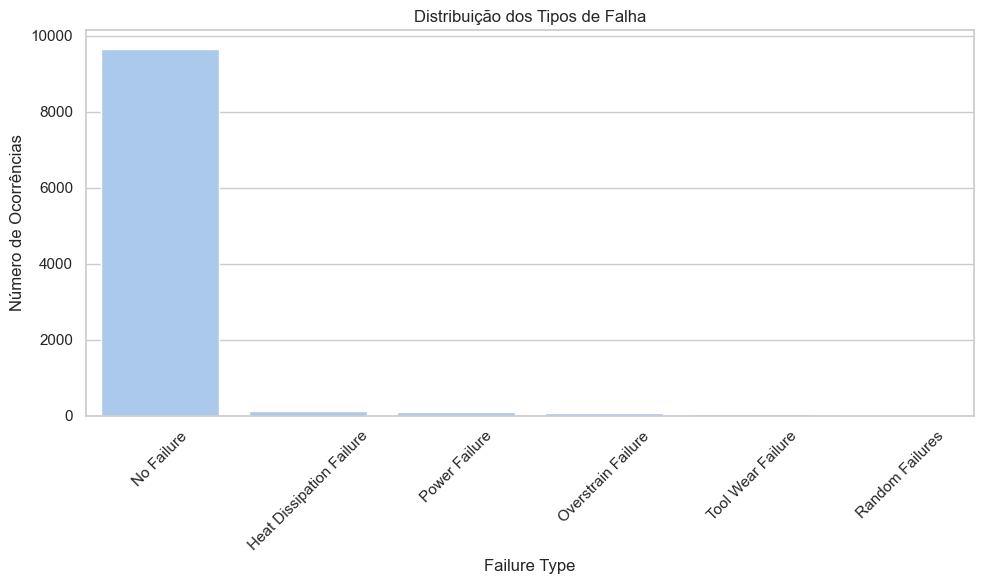

In [23]:
# 1. Distribuição das falhas
failure_counts = df["Failure Type"].value_counts()

plt.figure()
sns.barplot(x=failure_counts.index, y=failure_counts.values)
plt.title("Distribuição dos Tipos de Falha")
plt.ylabel("Número de Ocorrências")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

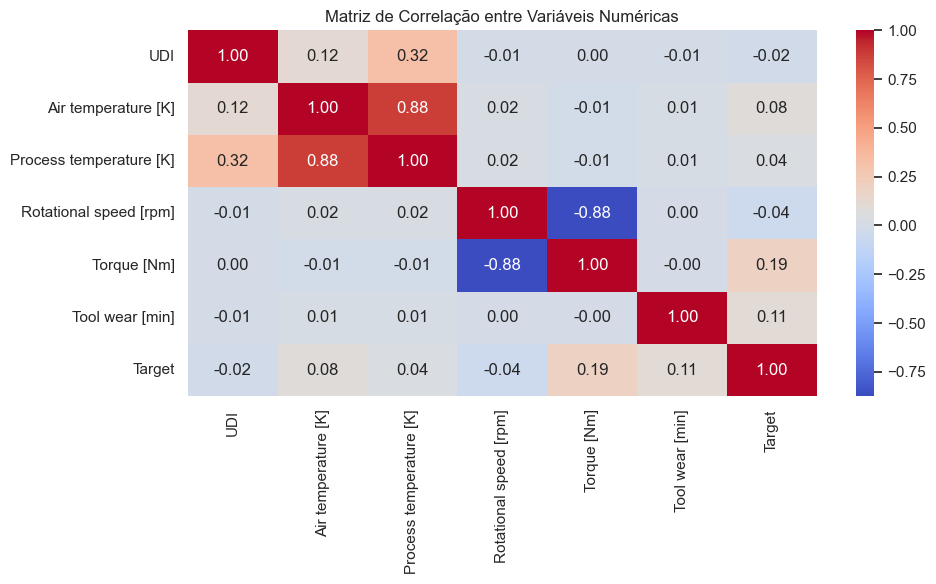

In [24]:
# 2. Correlação entre variáveis numéricas
plt.figure()
corr = df.select_dtypes(include=["float64", "int64"]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.tight_layout()
plt.show()

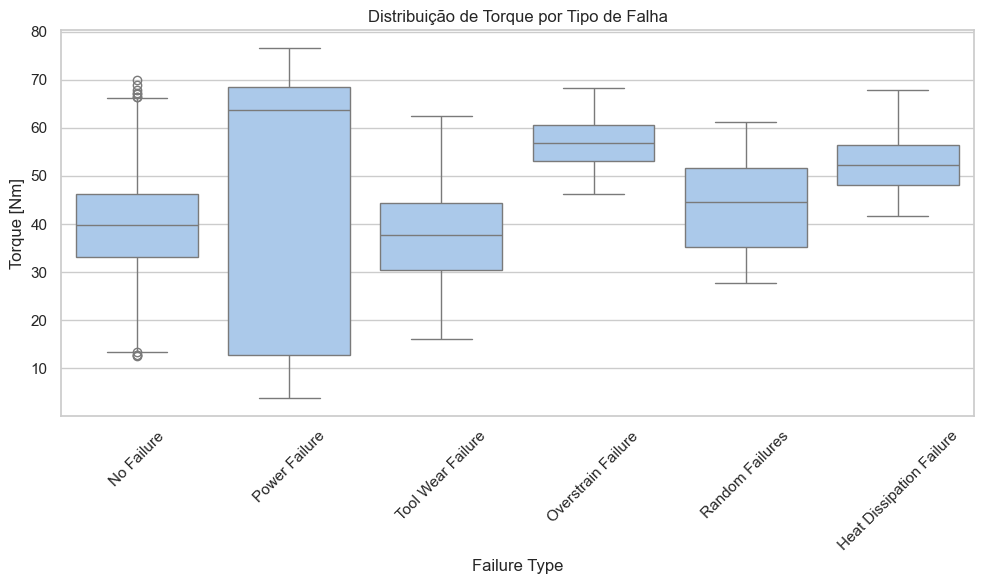

In [25]:
# 3. Distribuição de Torque por tipo de falha
plt.figure()
sns.boxplot(data=df, x="Failure Type", y="Torque [Nm]")
plt.title("Distribuição de Torque por Tipo de Falha")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

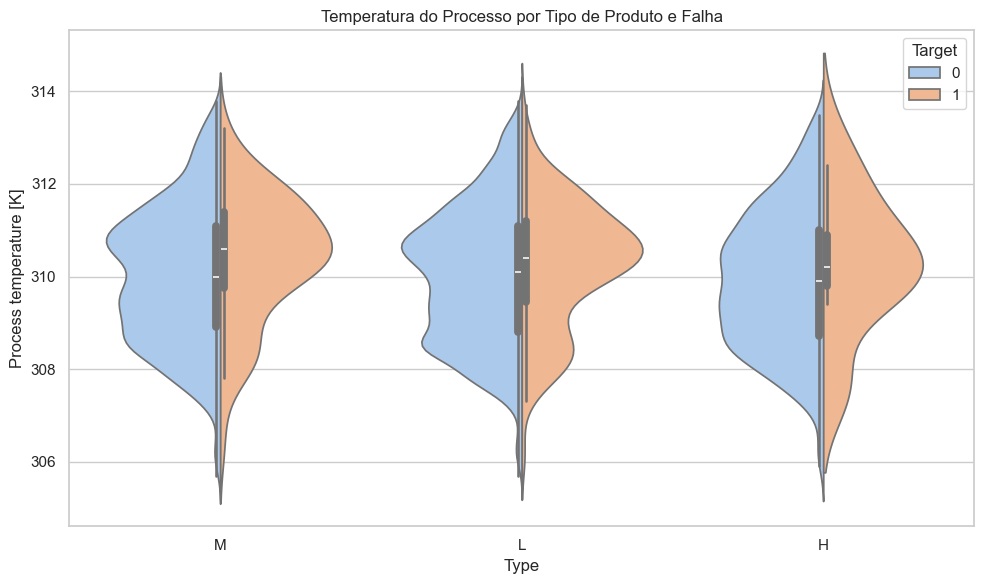

In [26]:
# 4. Distribuição da temperatura do processo por tipo
plt.figure()
sns.violinplot(data=df, x="Type", y="Process temperature [K]", hue="Target", split=True)
plt.title("Temperatura do Processo por Tipo de Produto e Falha")
plt.tight_layout()
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


In [31]:
df_model = df.copy()
df_model.drop(columns=["UDI", "Product ID"], inplace=True)


In [32]:
# Codificar variáveis categóricas
le_type = LabelEncoder()
df_model["Type"] = le_type.fit_transform(df_model["Type"])

X = df_model.drop(columns=["Failure Type", "Target"])
y = df_model["Target"]



In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Treinar Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
X

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,2,298.1,308.6,1551,42.8,0
1,1,298.2,308.7,1408,46.3,3
2,1,298.1,308.5,1498,49.4,5
3,1,298.2,308.6,1433,39.5,7
4,1,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14
9996,0,298.9,308.4,1632,31.8,17
9997,2,299.0,308.6,1645,33.4,22
9998,0,299.0,308.7,1408,48.5,25


In [35]:
# Previsões
y_pred = rf_model.predict(X_test)

# Métricas
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)



In [15]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

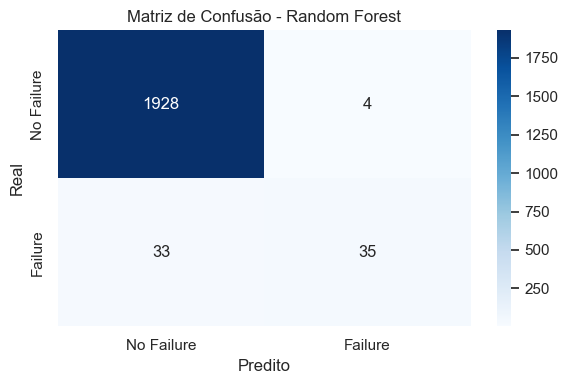

In [36]:
# Plot da matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Failure", "Failure"], yticklabels=["No Failure", "Failure"])
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.tight_layout()
plt.show()